In [191]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from pathlib import Path
from datetime import date, timedelta
import re
import multiprocessing as mult
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [12]:
data = pd.read_feather('data_proc_ver_2.feather')
data = data.drop(['level_0', 'index'], axis = 1)

In [13]:
data

,Game,Trial,Username,processed_text,target
0,196,1,adamhorsfall,[🟩🟩🟩🟩🟩],REBUS
1,196,1,TheRealPembo,[🟩🟩🟩🟩🟩],REBUS
2,196,1,grenow,[🟩🟩🟩🟩🟩],REBUS
3,196,1,Yummhh__,[🟩🟩🟩🟩🟩],REBUS
4,196,1,TowerGuardGames,[🟩🟩🟩🟩🟩],REBUS
...,...,...,...,...,...
6919914,515,6,moona_moony_,"[🟨⬜⬜⬜🟨, ⬜🟨🟨⬜⬜, ⬜⬜🟨🟨🟩, ⬜🟩⬜🟩🟩, ⬜🟩⬜🟩🟩, ⬜🟩⬜🟩🟩]",BAKER
6919915,515,6,JonMDexter,"[⬜⬜⬜⬜🟩, ⬜⬜⬜🟩🟩, ⬜🟩⬜🟩🟩, ⬜🟩⬜🟩🟩, ⬜🟩🟩🟩🟩, ⬜🟩🟩🟩🟩]",BAKER
6919916,515,6,KuronaNuva,"[⬜🟨🟨⬜🟨, 🟨🟩🟨⬜⬜, ⬜🟩⬜🟩🟩, ⬜🟩⬜🟩🟩, ⬜🟩⬜🟩🟩, ⬜🟩⬜🟩🟩]",BAKER
6919917,515,6,KZYONE,"[🟨🟨🟨⬜⬜, ⬜🟨🟨🟨⬜, ⬜⬜🟨🟨🟨, ⬜🟩⬜🟩🟩, ⬜🟩⬜🟩🟩, ⬜🟩⬜🟩🟩]",BAKER


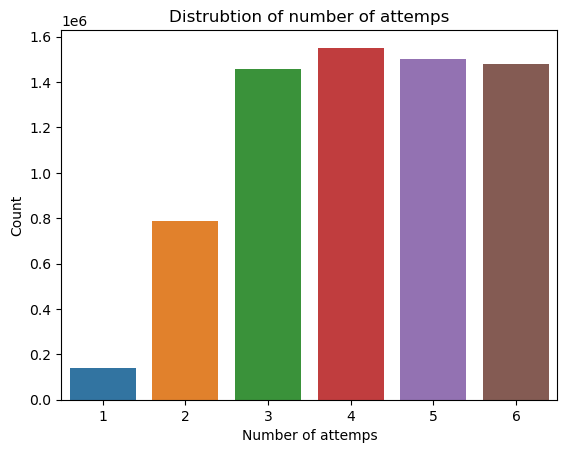

In [14]:
length_plot = sns.countplot(data = data, x = 'Trial')
length_plot.set_title("Distrubtion of number of attemps")
length_plot.set_xlabel("Number of attemps")
length_plot.set_ylabel("Count");

In [18]:
data['Trial'].describe()

count    6.919919e+06
mean     4.145558e+00
std      1.378262e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: Trial, dtype: float64

## Winrate
We can see that all the games end with a winning move.

In [21]:
data["processed_text"].str[-1].describe()

count     6919919
unique        238
top         🟩🟩🟩🟩🟩
freq      6546154
Name: processed_text, dtype: object

## Distrution of guesses, misses and misplacements

### First attempt

In [23]:
data['processed_text'].str[0]

0          🟩🟩🟩🟩🟩
1          🟩🟩🟩🟩🟩
2          🟩🟩🟩🟩🟩
3          🟩🟩🟩🟩🟩
4          🟩🟩🟩🟩🟩
           ...  
6919914    🟨⬜⬜⬜🟨
6919915    ⬜⬜⬜⬜🟩
6919916    ⬜🟨🟨⬜🟨
6919917    🟨🟨🟨⬜⬜
6919918    ⬜⬜🟨⬜⬜
Name: processed_text, Length: 6919919, dtype: object

In [24]:
first_attemps = pd.DataFrame(data['processed_text'].str[0])

In [25]:
first_attemps['green_count'] = first_attemps['processed_text'].str.count('🟩')
first_attemps['yellow_count'] = first_attemps['processed_text'].str.count('🟨')
first_attemps['black_count'] = first_attemps['processed_text'].str.count('⬜')

In [26]:
first_attemps.head()

,processed_text,green_count,yellow_count,black_count
0,🟩🟩🟩🟩🟩,5,0,0
1,🟩🟩🟩🟩🟩,5,0,0
2,🟩🟩🟩🟩🟩,5,0,0
3,🟩🟩🟩🟩🟩,5,0,0
4,🟩🟩🟩🟩🟩,5,0,0


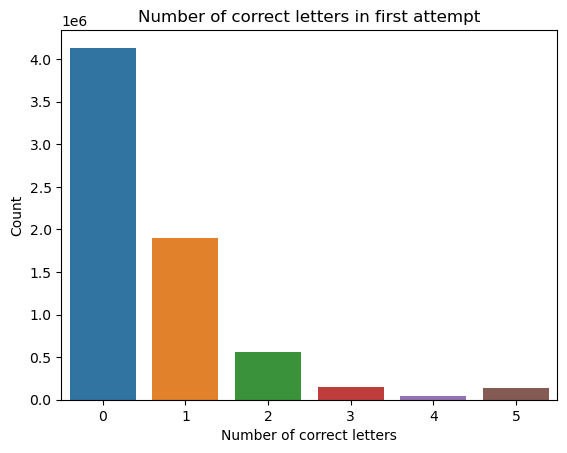

In [27]:
fa_green = sns.countplot(data = first_attemps, x = 'green_count')
fa_green.set_title("Number of correct letters in first attempt")
fa_green.set_xlabel("Number of correct letters")
fa_green.set_ylabel("Count");

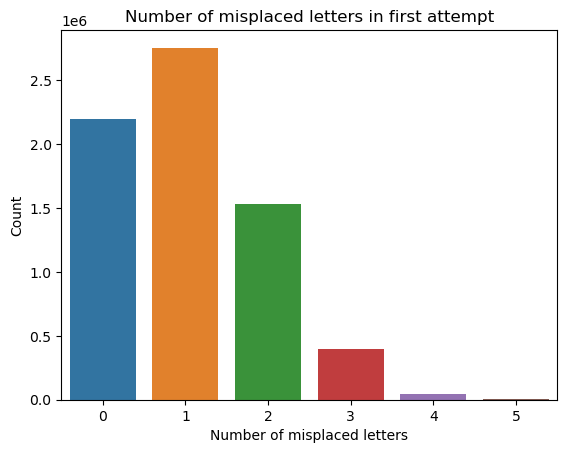

In [28]:
fa_yellow = sns.countplot(data = first_attemps, x = 'yellow_count')
fa_yellow.set_title("Number of misplaced letters in first attempt")
fa_yellow.set_xlabel("Number of misplaced letters")
fa_yellow.set_ylabel("Count");

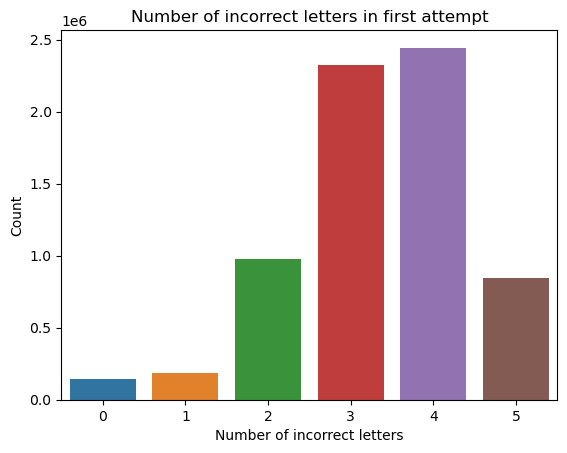

In [29]:
fa_black = sns.countplot(data = first_attemps, x = 'black_count')
fa_black.set_title("Number of incorrect letters in first attempt")
fa_black.set_xlabel("Number of incorrect letters")
fa_black.set_ylabel("Count");

### Across all attemps

Attemp number six is not used due to it consisting of only wins.

In [32]:
attemps = first_attemps.copy()
attemps['attemp'] = 1
attemps = attemps.drop(columns=['processed_text'])

In [33]:
for i in range(2,6):
    aux = pd.DataFrame(data['processed_text'].str[i])
    aux = aux.dropna()
    aux['green_count'] = aux['processed_text'].str.count('🟩')
    aux['yellow_count'] = aux['processed_text'].str.count('🟨')
    aux['black_count'] = aux['processed_text'].str.count('⬜')
    aux = aux.drop(columns=['processed_text'])
    aux['attemp'] = i
    attemps = pd.concat([attemps, aux])

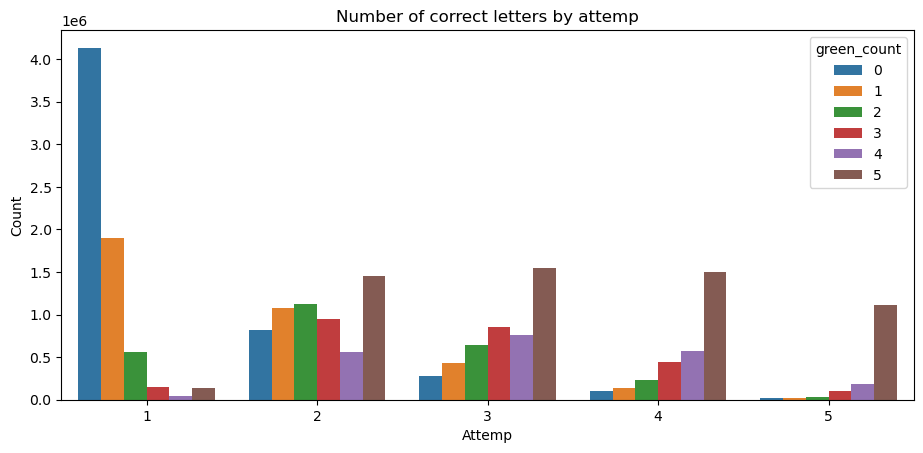

In [46]:
overall_green = sns.countplot(data = attemps, x = 'attemp', hue = 'green_count')
overall_green.set_title("Number of correct letters by attemp")
overall_green.set_xlabel("Attemp")
overall_green.set_ylabel("Count");
overall_green.figure.set_figwidth(11);

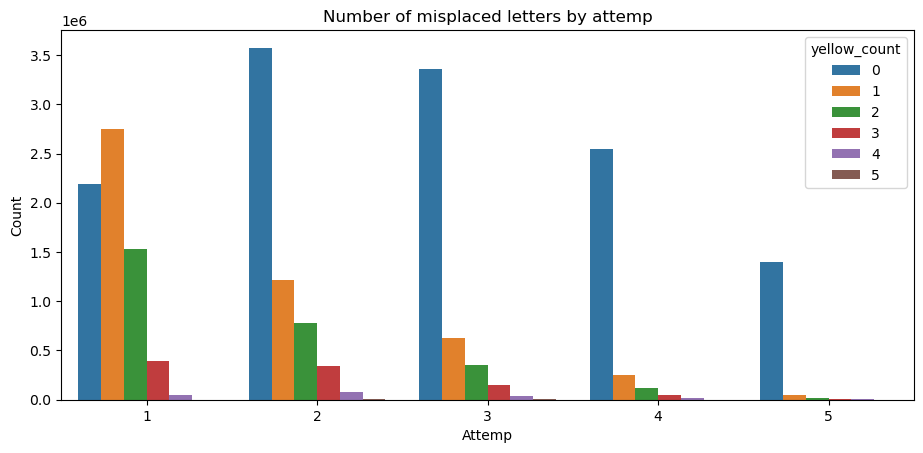

In [45]:
overall_yellow = sns.countplot(data = attemps, x = 'attemp', hue = 'yellow_count')
overall_yellow.set_title("Number of misplaced letters by attemp")
overall_yellow.set_xlabel("Attemp")
overall_yellow.set_ylabel("Count");
overall_yellow.figure.set_figwidth(11);

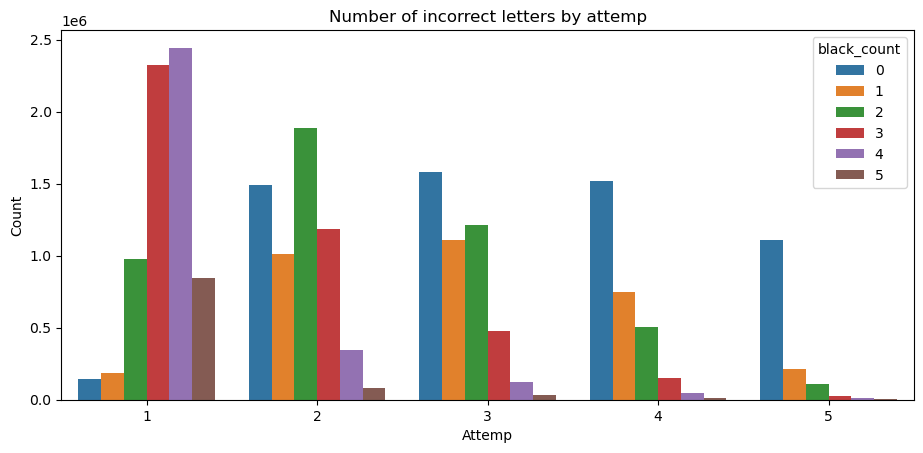

In [44]:
overall_black = sns.countplot(data = attemps, x = 'attemp', hue = 'black_count')
overall_black.set_title("Number of incorrect letters by attemp")
overall_black.set_xlabel("Attemp")
overall_black.set_ylabel("Count");
overall_black.figure.set_figwidth(11);

## Sorting by words

Let's see if any of the target words repeat themselves:

In [48]:
data['target'].describe()

count     6919919
unique        319
top         LIGHT
freq        32199
Name: target, dtype: object

Now in order to properly visualize the distribution of games we will split the dataset into 6 different batches.

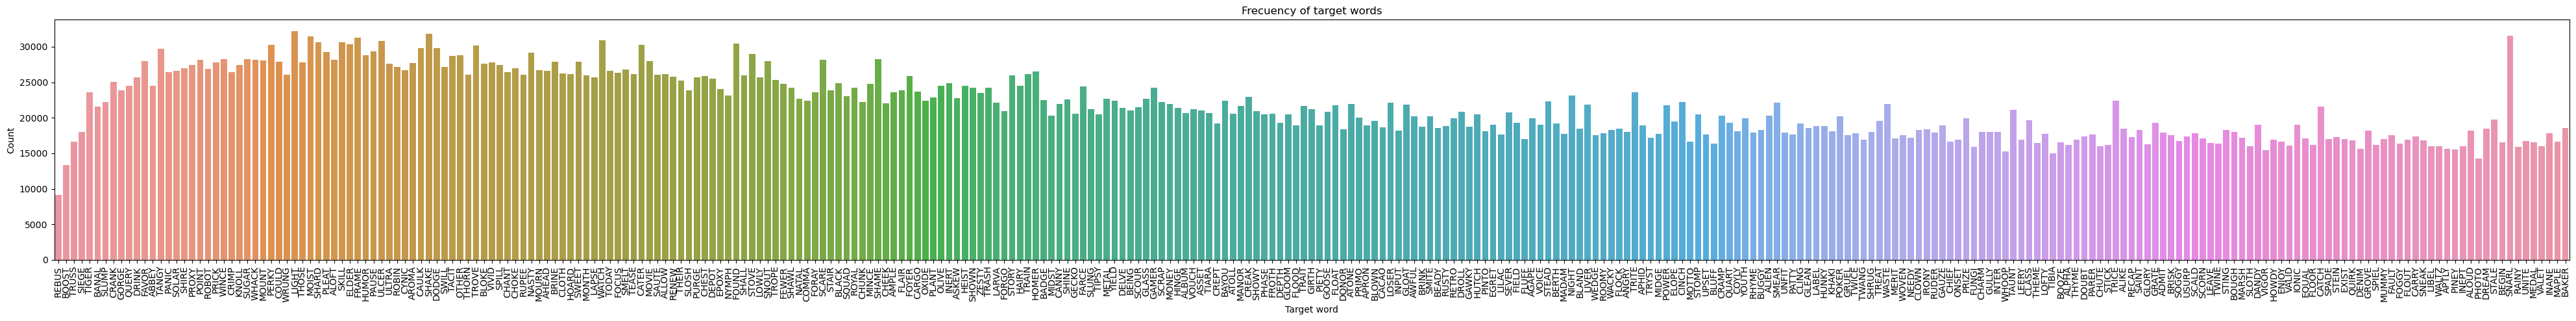

In [142]:
word_plot = sns.countplot(data = data, x = 'target')
word_plot.set_xlabel("Target word")
word_plot.set_ylabel("Count")
word_plot.set_title("Frecuency of target words")
word_plot.set_xticklabels(labels = word_plot.get_xticklabels() ,rotation = 90)
word_plot.figure.set_figwidth(50);

## Mean game length

Now we will continue to analize the mean game length for each game in our dataset.

In [126]:
mean_length = data.groupby('target', sort = False)['Trial'].mean()
mean_length = mean_length.to_frame()
mean_length.reset_index(inplace = True)

In [127]:
mean_val = data['Trial'].mean()

In [128]:
mean_length['Above'] = mean_length['Trial'].apply(lambda x: x-mean_val if x >= mean_val else 0)
mean_length['Less'] = mean_length['Trial'].apply(lambda x: x-mean_val if x < mean_val else 0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9336\1742143649.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(mean_val + tick, 2) for tick in ticks])


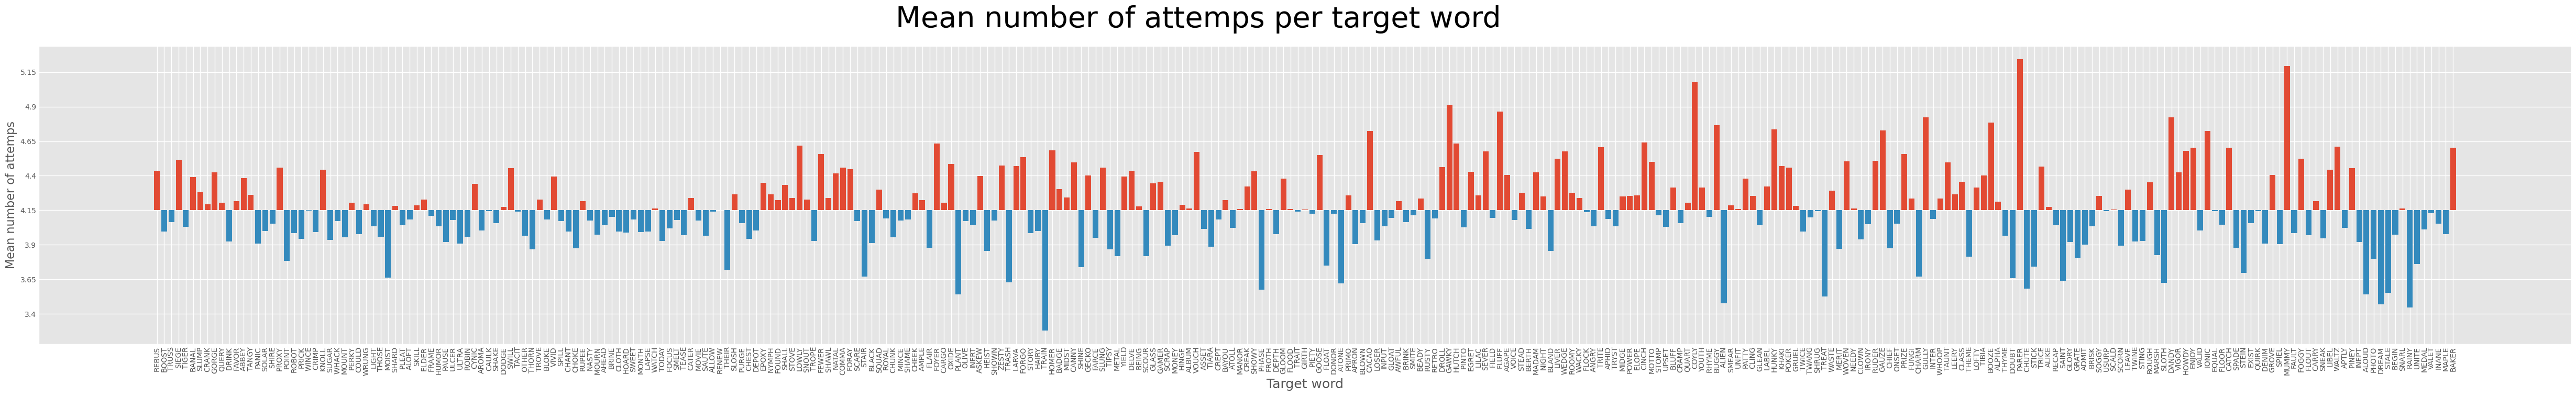

In [156]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(mean_length['target'], mean_length['Above'])
ax.bar(mean_length['target'], mean_length['Less'])
plt.xticks(rotation=90)
plt.tight_layout()
ticks = ax.get_yticks()
ax.set_yticklabels([round(mean_val + tick, 2) for tick in ticks])
fig.set_size_inches(55, 7)
fig.suptitle('Mean number of attemps per target word', fontsize=40, y = 1.08)
plt.xlabel('Target word', fontsize=18)
plt.ylabel('Mean number of attemps', fontsize=16)
plt.show()

## Short and long games

In [227]:
count_length = data.groupby('target', sort = False)['Trial'].apply(lambda x: (x>mean_val).sum())
count_length = count_length.to_frame()
count_length.reset_index(inplace = True)

count_less = data.groupby('target', sort = False)['Trial'].apply(lambda x: (x<=mean_val).sum())
count_less = count_less.to_frame()
count_less.reset_index(inplace = True)
count_length['less'] = count_less['Trial']

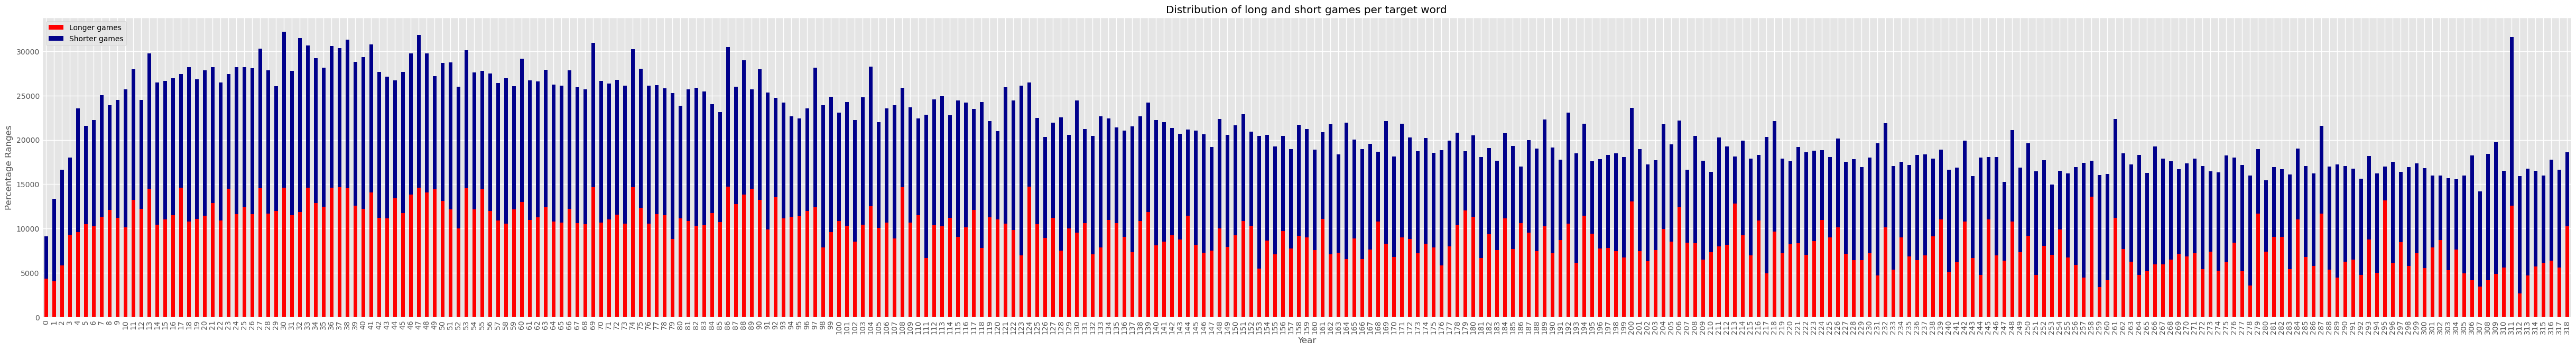

In [228]:
count_length.set_index('target')
count_length = count_length.rename(columns={"Trial": "Longer games", "less": "Shorter games"})
count_length.set_index('target')
count_length.plot(kind = 'bar', stacked = True, color = ['red', 'darkblue'])
plt.title('Distribution of long and short games per target word')
plt.xlabel('Year')
plt.ylabel('Percentage Ranges')
fig = plt.gcf()
fig.set_size_inches(55, 7)